# Convolutional Neural Network
- CIFAR-10 dataset

## 1. Settings
### 1) Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

### 2) Set hyperparameters

In [2]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 100

## 2. Data Generation

### 1) Download Data

In [3]:
cifar_train = dset.CIFAR10("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
cifar_test = dset.CIFAR10("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████████████████▉| 169943040/170498071 [00:39<00:00, 7175960.49it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


170500096it [00:49, 7175960.49it/s]                                            

### 2) Check Dataset

In [4]:
print(cifar_train.__getitem__(0)[0].size(), cifar_train.__getitem__(0)[1], cifar_train.__len__())
cifar_test.__getitem__(0)[0].size(), cifar_test.__getitem__(0)[1], cifar_test.__len__()

torch.Size([3, 32, 32]) 6 50000


(torch.Size([3, 32, 32]), 3, 10000)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

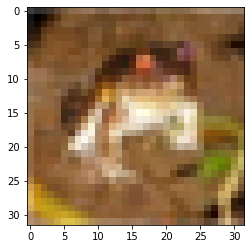

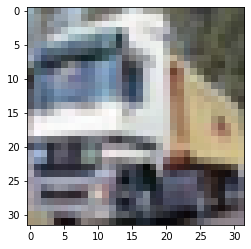

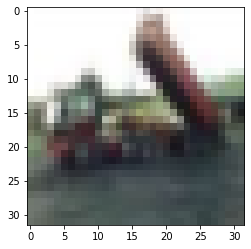

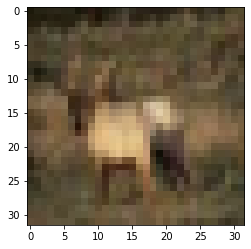

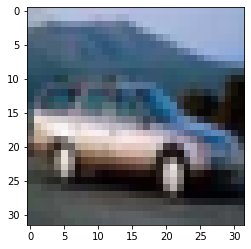

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
    img= cifar_train[i][0].numpy().transpose(1,2,0)
    plt.imshow(img)
    plt.show()

### 3) Set DataLoader

In [6]:
train_loader = torch.utils.data.DataLoader(cifar_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(cifar_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 3. Model & Optimizer

### 1) CNN Model

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3,16,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 32 x 16 x 16
            
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(64,128,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 128 x 8 x 8
            
            nn.Conv2d(128,256,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)  # 256 x 4 x 4
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(256*4*4,200),
            nn.ReLU(),
            nn.Linear(200,10)
        )       
        
    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)

        return out

model = CNN().cuda()

### 2) Loss func & Optimizer

In [0]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 3) Load Model

In [18]:
'''''
try:
    model = torch.load('./cifar_model.pkl')
    print("model restored")
except:
    print("model not restored")
'''''

model not restored


## 4. Train 

In [27]:
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = Variable(image).cuda()
        y_= Variable(label).cuda()
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 100 == 0:
            print(loss.data,i,j)
            #torch.save(model,'./cifar_model.pkl')

print("Done!!!")

tensor(2.3038, device='cuda:0') 0 0
tensor(1.9623, device='cuda:0') 0 100
tensor(1.7007, device='cuda:0') 1 0
tensor(1.6464, device='cuda:0') 1 100
tensor(1.5360, device='cuda:0') 2 0
tensor(1.4621, device='cuda:0') 2 100
tensor(1.5090, device='cuda:0') 3 0
tensor(1.4032, device='cuda:0') 3 100
tensor(1.3944, device='cuda:0') 4 0
tensor(1.3417, device='cuda:0') 4 100
tensor(1.4284, device='cuda:0') 5 0
tensor(1.3371, device='cuda:0') 5 100
tensor(1.2117, device='cuda:0') 6 0
tensor(1.3187, device='cuda:0') 6 100
tensor(1.2234, device='cuda:0') 7 0
tensor(1.3046, device='cuda:0') 7 100
tensor(1.1251, device='cuda:0') 8 0
tensor(1.1365, device='cuda:0') 8 100
tensor(1.1897, device='cuda:0') 9 0
tensor(1.1130, device='cuda:0') 9 100
tensor(0.9910, device='cuda:0') 10 0
tensor(1.0128, device='cuda:0') 10 100
tensor(1.1916, device='cuda:0') 11 0
tensor(1.0311, device='cuda:0') 11 100
tensor(0.9296, device='cuda:0') 12 0
tensor(1.0929, device='cuda:0') 12 100
tensor(0.9224, device='cuda:0') 

In [29]:
param_list = list(model.children())
print(param_list)

[Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=4096, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=10, bias=True)
)]


## 5. Test

In [32]:
correct = 0
total = 0

for image,label in test_loader:
    #x = Variable(image,volatile=True).cuda()
    x = Variable(image).cuda()
    y_= Variable(label).cuda()

    output = model.forward(x)
    _,output_index = torch.max(output,1)
        
    total += label.size(0)
    correct += (output_index == y_).sum().float()
    
print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 72.94671630859375
